In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
araba=cv2.imread('car_plate.jpg')

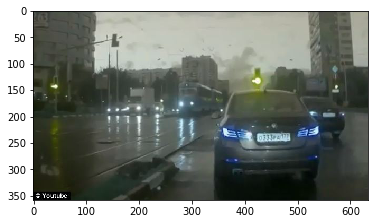

In [3]:
plt.imshow(araba)

In [4]:
def display(img):
    res=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(res)

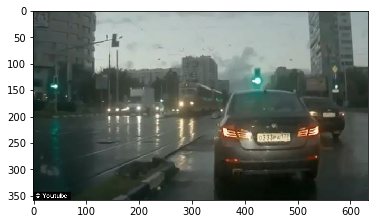

In [5]:
display(araba)

In [6]:
plate_cascade=cv2.CascadeClassifier('plaka.xml')

In [7]:
def detect_plate(img):
    
    plate_img=img.copy()
    
    plate_rects=plate_cascade.detectMultiScale(plate_img)
    
    for(x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,255,255),5)
        
    return plate_img

In [8]:
result=detect_plate(araba)

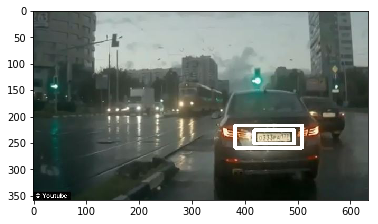

In [9]:
display(result)

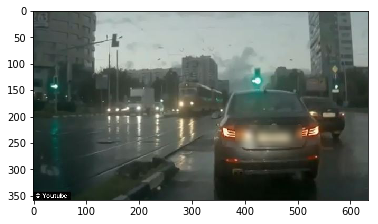

In [10]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img)
    return plate_rects

def detect_and_blur_plate(image, plate_rects, blur_factor=15):
    blurred_image = image.copy()
    for (x, y, w, h) in plate_rects:
        plate_region = blurred_image[y:y+h, x:x+w]
        blurred_plate_region = cv2.blur(plate_region, (blur_factor, blur_factor))
        blurred_image[y:y+h, x:x+w] = blurred_plate_region
    return blurred_image

plate_rects = detect_plate(araba)

blurred_result = detect_and_blur_plate(araba, plate_rects)

display(blurred_result)